<a href="https://colab.research.google.com/github/Mykolays/Data_visualization/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

We have a set of data on real estate objects sold in
King County (Washington, USA) between May 2014 and May 2015.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

path = "/content/drive/MyDrive/It in analitic/kc_house_data.csv"
df = pd.read_csv(path, sep=",", index_col="id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(12)
memory usag

All data is not null

Display the distribution of house prices (price column) in the form of a histogram. Select the number of intervals (bins) experimentally. Add a caption to the Ox axis and a graph name.

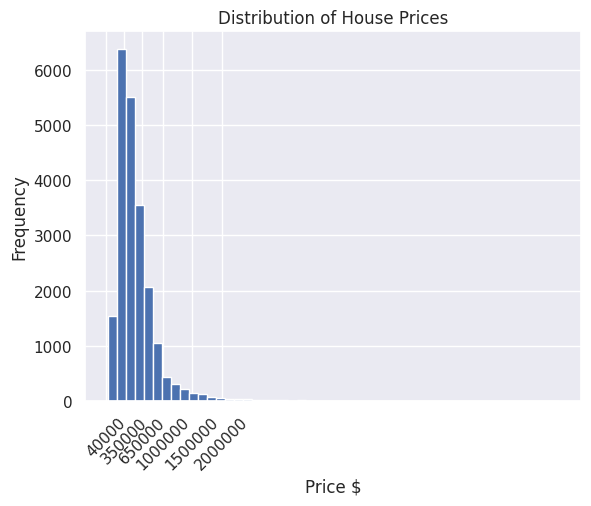

In [ ]:
plt.hist(df['price'],bins=50)

plt.xlabel('Price $')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.xticks(ticks=[40_000, 350_000, 650_000,1_000_000, 1_500_000, 2_000_000], labels=[40_000, 350_000, 650_000,1_000_000, 1_500_000, 2_000_000], rotation=45)


plt.show()

Construct a graph to visualize the ratio of total living space (sqft_living) to price (price). Set the graph parameters:
* captions to the axes, the name of the graph;
* marker type: circle; size: 20; color: green.

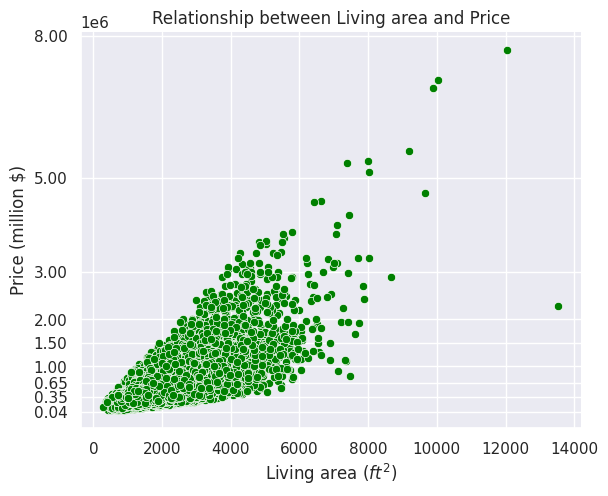

In [2]:
sns.relplot(data=df,
            x="sqft_living",
            y="price",
            kind="scatter",
            color='green',
            aspect=1.2
            )

plt.xlabel('Living area ($ft^2$)')
plt.ylabel('Price (million $)')
plt.title('Relationship between Living area and Price')
plt.yticks(ticks=[40_000, 350_000, 650_000,1_000_000, 1_500_000, 2_000_000, 3_000_000,5_000_000, 8_000_000])

plt.show()

Complete the parameters of the previous graph to show the presence / absence of a sea view (waterfront column). Make a division into groups according to the feature of waterfront by dividing into two graphs. Which of the last two visualizations conveys the information more clearly?

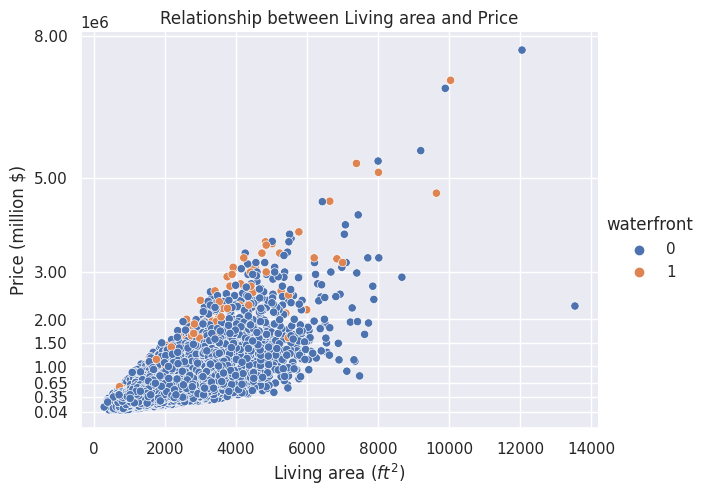

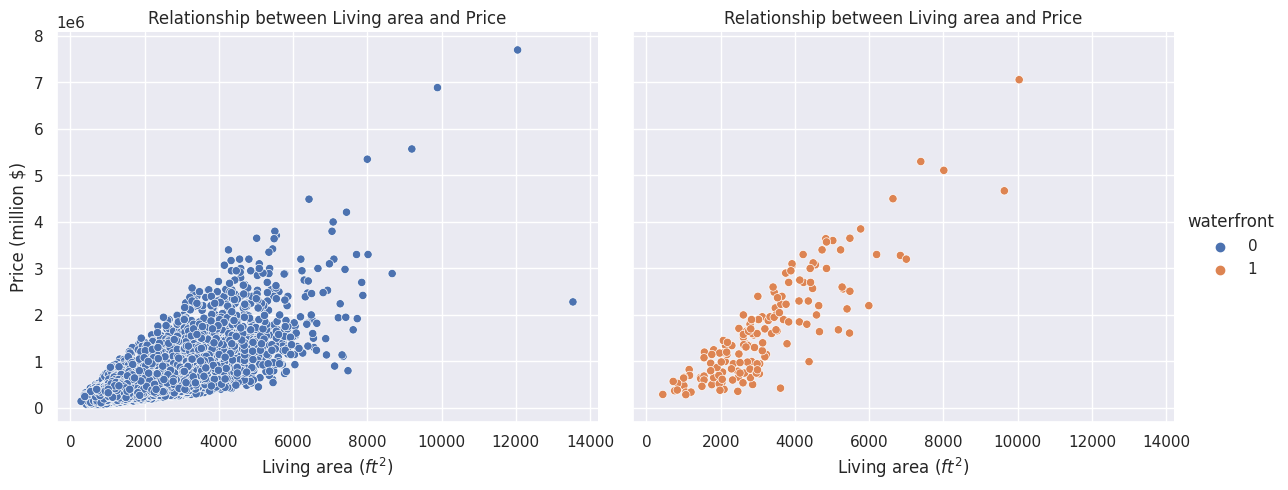

In [3]:
sns.relplot(data=df,
            x="sqft_living",
            y="price",
            hue="waterfront",
            kind="scatter",
            color='green',
            aspect=1.2
            ).set_axis_labels("Living area ($ft^2$)", "Price (million $)")
plt.title('Relationship between Living area and Price')
plt.yticks(ticks=[40_000, 350_000, 650_000,1_000_000, 1_500_000, 2_000_000, 3_000_000,5_000_000, 8_000_000])

sns.relplot(data=df,
            x="sqft_living",
            y="price",
            kind="scatter",
            hue="waterfront",
            aspect=1.2,col="waterfront"
            ).set_axis_labels("Living area ($ft^2$)", "Price (million $)")\
            .set_titles("Relationship between Living area and Price")

plt.show()

Plot the distribution of the year the house was built (yr _built). Set the graph parameters.

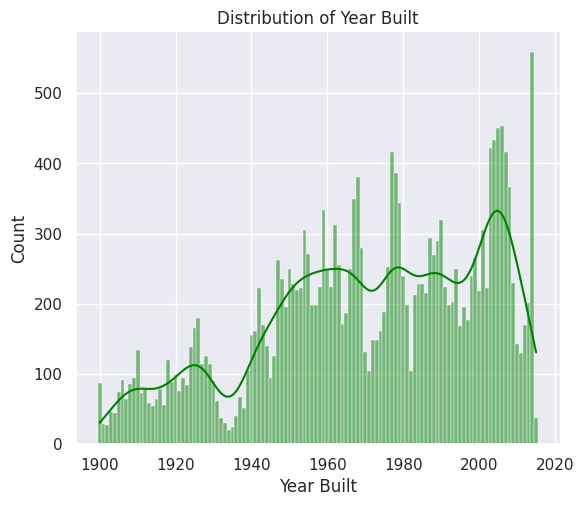

In [4]:
sns.displot(df, x='yr_built', color='green', aspect=1.2,discrete=True, kde=True)\
          .set_axis_labels('Year Built')
plt.title('Distribution of Year Built')
plt.show()

Show the distribution of the number of houses by grade.

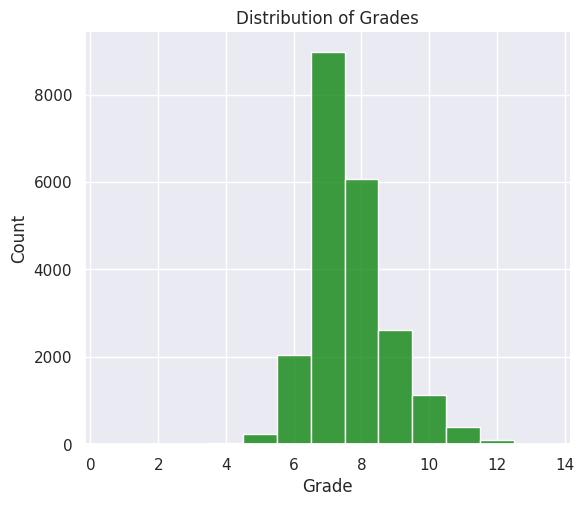

In [5]:
sns.displot(df, x='grade', color='green', aspect=1.2,discrete=True)\
          .set_titles('Distribution of Year Built')\
          .set_axis_labels('Grade')
plt.title('Distribution of Grades')
plt.show()


Зобразіть співвідношення між загальної оцінкою дому (grade) та середньої ціною
будинків з даною оцінкою (перед цим необхідно зробити відповідні обчислення).

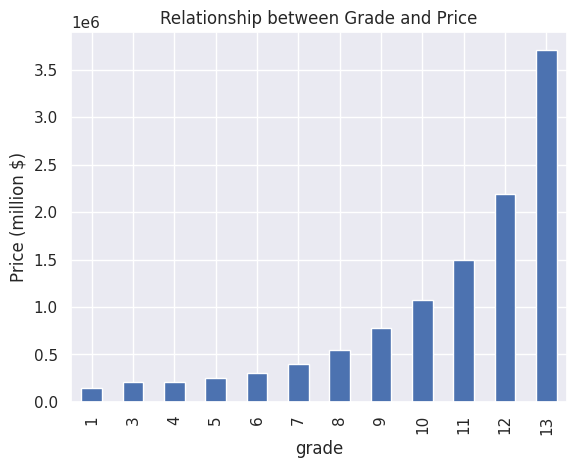

In [18]:
grade_avgPrice = df.groupby('grade')['price'].mean().plot(kind="bar")
plt.title('Relationship between Grade and Price')
plt.ylabel('Price (million $)')
plt.show()

Draw on two adjacent graphs (along the common axis Oy) the distribution of houses by
number of bedrooms and bathrooms.

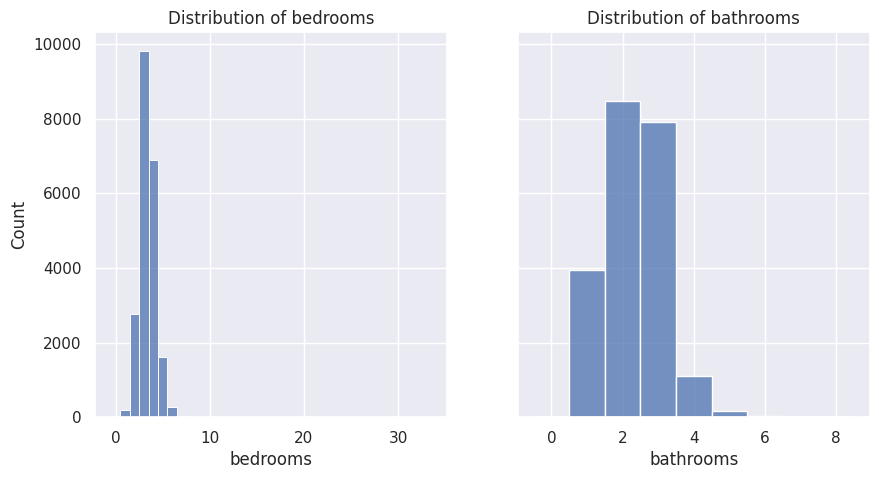

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


sns.histplot(data=df, x='bedrooms', ax=ax[0],discrete=True)
ax[0].set_title('Distribution of bedrooms')

sns.histplot(data=df, x='bathrooms', ax=ax[1],discrete=True)
ax[1].set_title('Distribution of bathrooms')

plt.show()

Does the price of the house depend on its geographical location (latitude and longitude
long)? Consider the appropriate type of visualization.

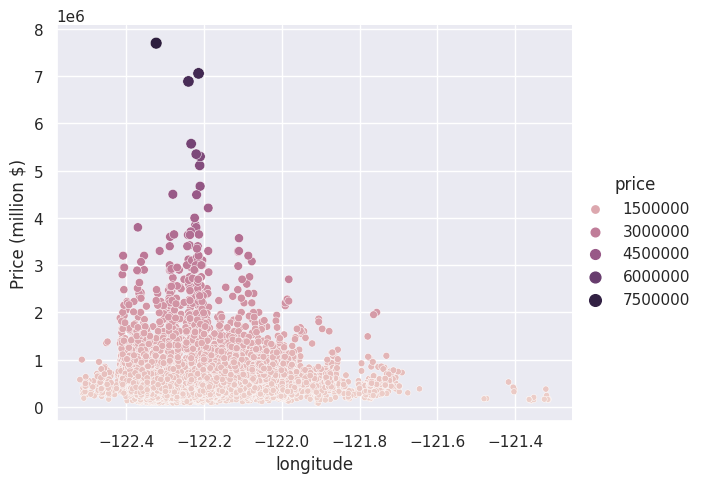

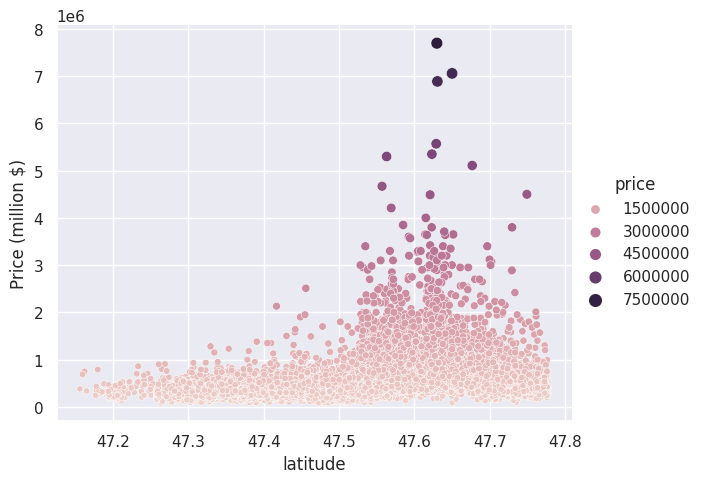

In [20]:
sns.relplot(data=df,
            x='long',
            y='price',
            kind='scatter',
            size='price',
            hue='price',
            aspect=1.2
            ).set_axis_labels("longitude", "Price (million $)")
sns.relplot(data=df,
            x='lat',
            y='price',
            size='price',
            kind='scatter',
            hue='price',
            aspect=1.2
            ).set_axis_labels("latitude", "Price (million $)")

Text(0.5, 1.0, 'Relationship between geographical location and price')

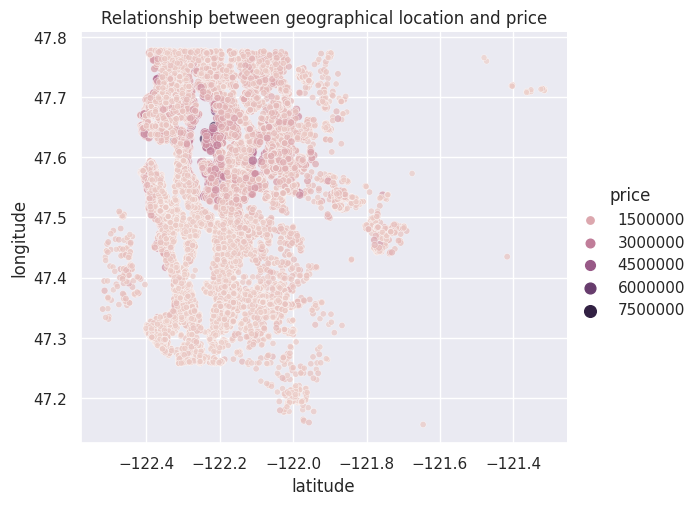

In [21]:
sns.relplot(data=df,
            x='long',
            y='lat',
            kind='scatter',
            size='price',
            hue='price',
            alpha=0.7,
            aspect=1.2
            ).set_axis_labels("latitude", "longitude")
plt.title('Relationship between geographical location and price')